# Introduction to ML - LSTM using Keras

In [23]:
1import pandas as pd
import numpy as np
import pyarrow as pa
import pyarrow.parquet as pq
import pyarrow.dataset as ds
import os
import datetime

In [24]:
dataset = ds.dataset('data/us_equity/dataset/')
dataset.schema

TradeDate: timestamp[us]
SecId: int64
OpenBarTimeOffset: decimal128(1, 0)
OpenBidPrice: double
OpenBidSize: int64
OpenAskPrice: double
OpenAskSize: int64
FirstTradeTimeOffset: decimal128(11, 9)
FirstTradePrice: double
FirstTradeSize: int64
HighBidTimeOffset: decimal128(11, 9)
HighBidPrice: double
HighBidSize: int64
HighAskTimeOffset: decimal128(11, 9)
HighAskPrice: double
HighAskSize: int64
HighTradeTimeOffset: decimal128(11, 9)
HighTradePrice: double
HighTradeSize: int64
LowBidTimeOffset: decimal128(11, 9)
LowBidPrice: double
LowBidSize: int64
LowAskTimeOffset: decimal128(11, 9)
LowAskPrice: double
LowAskSize: int64
LowTradeTimeOffset: decimal128(11, 9)
LowTradePrice: double
LowTradeSize: int64
CloseBarTimeOffset: decimal128(11, 9)
CloseBidPrice: double
CloseBidSize: int64
CloseAskPrice: double
CloseAskSize: int64
LastTradeTimeOffset: decimal128(11, 9)
LastTradePrice: double
LastTradeSize: int64
MinSpread: double
MaxSpread: double
CancelSize: int64
VolumeWeightPrice: double
NBBOQuoteC

TradeDate: timestamp[us]
SecId: int64
OpenBarTimeOffset: decimal128(1, 0)
OpenBidPrice: double
OpenBidSize: int64
OpenAskPrice: double
OpenAskSize: int64
FirstTradeTimeOffset: decimal128(11, 9)
FirstTradePrice: double
FirstTradeSize: int64
HighBidTimeOffset: decimal128(11, 9)
HighBidPrice: double
HighBidSize: int64
HighAskTimeOffset: decimal128(11, 9)
HighAskPrice: double
HighAskSize: int64
HighTradeTimeOffset: decimal128(11, 9)
HighTradePrice: double
HighTradeSize: int64
LowBidTimeOffset: decimal128(11, 9)
LowBidPrice: double
LowBidSize: int64
LowAskTimeOffset: decimal128(11, 9)
LowAskPrice: double
LowAskSize: int64
LowTradeTimeOffset: decimal128(11, 9)
LowTradePrice: double
LowTradeSize: int64
CloseBarTimeOffset: decimal128(11, 9)
CloseBidPrice: double
CloseBidSize: int64
CloseAskPrice: double
CloseAskSize: int64
LastTradeTimeOffset: decimal128(11, 9)
LastTradePrice: double
LastTradeSize: int64
MinSpread: double
MaxSpread: double
CancelSize: int64
VolumeWeightPrice: double
NBBOQuoteC

In [25]:
df = dataset.to_table(filter = ds.field('TradeDate') >= datetime.date(2021,1,1), columns=['BarDateTime','SecId','ret1min']).to_pandas()

In [26]:
df.head()

,SecId,ret1min
BarDateTime,,
2021-01-11 04:00:00-05:00,0,0.000076
2021-01-11 04:01:00-05:00,0,-0.000684
2021-01-11 04:02:00-05:00,0,-0.000532
2021-01-11 04:03:00-05:00,0,-0.000380
2021-01-11 04:04:00-05:00,0,-0.000304


,SecId,ret1min
BarDateTime,,
2021-01-11 04:00:00-05:00,0,0.000076
2021-01-11 04:01:00-05:00,0,-0.000684
2021-01-11 04:02:00-05:00,0,-0.000532
2021-01-11 04:03:00-05:00,0,-0.000380
2021-01-11 04:04:00-05:00,0,-0.000304


In [27]:
df.SecId

BarDateTime
2021-01-11 04:00:00-05:00          0
2021-01-11 04:01:00-05:00          0
2021-01-11 04:02:00-05:00          0
2021-01-11 04:03:00-05:00          0
2021-01-11 04:04:00-05:00          0
                              ...   
2022-06-09 19:55:00-04:00    4579564
2022-06-09 19:56:00-04:00    4579564
2022-06-09 19:57:00-04:00    4579564
2022-06-09 19:58:00-04:00    4579564
2022-06-09 19:59:00-04:00    4579564
Name: SecId, Length: 1865156, dtype: int64

BarDateTime
2021-01-11 04:00:00-05:00          0
2021-01-11 04:01:00-05:00          0
2021-01-11 04:02:00-05:00          0
2021-01-11 04:03:00-05:00          0
2021-01-11 04:04:00-05:00          0
                              ...   
2022-06-09 19:55:00-04:00    4579564
2022-06-09 19:56:00-04:00    4579564
2022-06-09 19:57:00-04:00    4579564
2022-06-09 19:58:00-04:00    4579564
2022-06-09 19:59:00-04:00    4579564
Name: SecId, Length: 1865156, dtype: int64

In [28]:
data = df[df.SecId == 0]
data.head()

,SecId,ret1min
BarDateTime,,
2021-01-11 04:00:00-05:00,0,0.000076
2021-01-11 04:01:00-05:00,0,-0.000684
2021-01-11 04:02:00-05:00,0,-0.000532
2021-01-11 04:03:00-05:00,0,-0.000380
2021-01-11 04:04:00-05:00,0,-0.000304


,SecId,ret1min
BarDateTime,,
2021-01-11 04:00:00-05:00,0,0.000076
2021-01-11 04:01:00-05:00,0,-0.000684
2021-01-11 04:02:00-05:00,0,-0.000532
2021-01-11 04:03:00-05:00,0,-0.000380
2021-01-11 04:04:00-05:00,0,-0.000304


In [29]:
data.ret1min

BarDateTime
2021-01-11 04:00:00-05:00    0.000076
2021-01-11 04:01:00-05:00   -0.000684
2021-01-11 04:02:00-05:00   -0.000532
2021-01-11 04:03:00-05:00   -0.000380
2021-01-11 04:04:00-05:00   -0.000304
                               ...   
2022-03-09 19:55:00-05:00    0.000000
2022-03-09 19:56:00-05:00    0.000000
2022-03-09 19:57:00-05:00    0.000000
2022-03-09 19:58:00-05:00    0.000693
2022-03-09 19:59:00-05:00    0.000000
Name: ret1min, Length: 1732676, dtype: float64

BarDateTime
2021-01-11 04:00:00-05:00    0.000076
2021-01-11 04:01:00-05:00   -0.000684
2021-01-11 04:02:00-05:00   -0.000532
2021-01-11 04:03:00-05:00   -0.000380
2021-01-11 04:04:00-05:00   -0.000304
                               ...   
2022-03-09 19:55:00-05:00    0.000000
2022-03-09 19:56:00-05:00    0.000000
2022-03-09 19:57:00-05:00    0.000000
2022-03-09 19:58:00-05:00    0.000693
2022-03-09 19:59:00-05:00    0.000000
Name: ret1min, Length: 1732676, dtype: float64

In [30]:
data.isna().any()

SecId      False
ret1min     True
dtype: bool

SecId      False
ret1min     True
dtype: bool

In [31]:
data = data.dropna()

Univariate LSTM

In [32]:
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Dense  
from tensorflow.keras.layers import LSTM  
from tensorflow.keras.layers import Dropout  

In [33]:
data_train = data[1:1700000]
data_test = data[1700001:1732675]

In [34]:
scaler = MinMaxScaler(feature_range=((0,1)))
data_train_scaled = scaler.fit_transform(data_train.values)

In [35]:
features_set = []  
labels = []  
for i in range(60, 1536619):  
    features_set.append(data_train_scaled[i-60:i,1])
    labels.append(data_train_scaled[i,1])

In [36]:
features_set

[array([0.76171488, 0.76191671, 0.76211862, 0.76221961, 0.76323167,
        0.76221961, 0.75958795, 0.76353699, 0.76120563, 0.76384168,
        0.76150981, 0.76282715, 0.76242159, 0.76242156, 0.76313141,
        0.76282712, 0.76373947, 0.76232029, 0.76302984, 0.76252298,
        0.76302956, 0.76252304, 0.76343485, 0.76211808, 0.76211789,
        0.76232036, 0.76252301, 0.7614083 , 0.76414601, 0.76313118,
        0.76252294, 0.76333364, 0.7636367 , 0.76252307, 0.76292805,
        0.76211828, 0.76272552, 0.76171356, 0.76232052, 0.7636377 ,
        0.76262434, 0.76353554, 0.76242199, 0.76343448, 0.76262434,
        0.76181451, 0.7620166 , 0.76262434, 0.762219  , 0.76292842,
        0.76282701, 0.76242173, 0.76262434, 0.76252304, 0.76282697,
        0.76262434, 0.76262434, 0.76232042, 0.76272567, 0.76262434]),
 array([0.76191671, 0.76211862, 0.76221961, 0.76323167, 0.76221961,
        0.75958795, 0.76353699, 0.76120563, 0.76384168, 0.76150981,
        0.76282715, 0.76242159, 0.76242156, 0.

[array([0.76171488, 0.76191671, 0.76211862, 0.76221961, 0.76323167,
        0.76221961, 0.75958795, 0.76353699, 0.76120563, 0.76384168,
        0.76150981, 0.76282715, 0.76242159, 0.76242156, 0.76313141,
        0.76282712, 0.76373947, 0.76232029, 0.76302984, 0.76252298,
        0.76302956, 0.76252304, 0.76343485, 0.76211808, 0.76211789,
        0.76232036, 0.76252301, 0.7614083 , 0.76414601, 0.76313118,
        0.76252294, 0.76333364, 0.7636367 , 0.76252307, 0.76292805,
        0.76211828, 0.76272552, 0.76171356, 0.76232052, 0.7636377 ,
        0.76262434, 0.76353554, 0.76242199, 0.76343448, 0.76262434,
        0.76181451, 0.7620166 , 0.76262434, 0.762219  , 0.76292842,
        0.76282701, 0.76242173, 0.76262434, 0.76252304, 0.76282697,
        0.76262434, 0.76262434, 0.76232042, 0.76272567, 0.76262434]),
 array([0.76191671, 0.76211862, 0.76221961, 0.76323167, 0.76221961,
        0.75958795, 0.76353699, 0.76120563, 0.76384168, 0.76150981,
        0.76282715, 0.76242159, 0.76242156, 0.

In [37]:
np.array(features_set).shape
np.array(labels).shape

(1536559,)

(1536559,)

In [38]:
print(len(features_set))
print(len(labels))
print(len(features_set[0]))
#print(features_set)
print(labels[0])

1536559
1536559
60
0.7626243410279093
1536559
1536559
60
0.7626243410279093


In [39]:
features_set, labels = np.array(features_set), np.array(labels)  
print(features_set.shape)
print(features_set.shape[0], features_set.shape[1])
print(labels.shape)
print(labels)

(1536559, 60)
1536559 60
(1536559,)
[0.76262434 0.76262434 0.76252304 ... 0.76262434 0.76354578 0.76262434]
(1536559, 60)
1536559 60
(1536559,)
[0.76262434 0.76262434 0.76252304 ... 0.76262434 0.76354578 0.76262434]


In [40]:
# convert training data to the right shape
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))

In [41]:
lstm_model = Sequential()  
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1),unroll=False))  
lstm_model.add(Dropout(0.2))  
lstm_model.add(LSTM(units=50, return_sequences=True))  
lstm_model.add(Dropout(0.2))

lstm_model.add(LSTM(units=50, return_sequences=True))  
lstm_model.add(Dropout(0.2))

lstm_model.add(LSTM(units=50))  
lstm_model.add(Dropout(0.2))  
lstm_model.add(Dense(units = 1))  

lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [20]:
lstm_model.compile(optimizer = 'adam', loss = 'mean_squared_error')  
lstm_history = lstm_model.fit(features_set, labels, epochs = 500, batch_size = 32)  


Epoch 1/500
48018/48018 [==============================] - 876s 18ms/step - loss: 2.2890e-04
Epoch 2/500
48018/48018 [==============================] - 868s 18ms/step - loss: 3.3610e-06
Epoch 3/500
48018/48018 [==============================] - 869s 18ms/step - loss: 3.3636e-06
Epoch 4/500
48018/48018 [==============================] - 874s 18ms/step - loss: 3.3600e-06
Epoch 5/500
48018/48018 [==============================] - 875s 18ms/step - loss: 3.3639e-06
Epoch 6/500
48018/48018 [==============================] - 876s 18ms/step - loss: 3.3605e-06
Epoch 7/500
48018/48018 [==============================] - 874s 18ms/step - loss: 3.3624e-06
Epoch 8/500
48018/48018 [==============================] - 880s 18ms/step - loss: 3.3662e-06
Epoch 9/500
48018/48018 [==============================] - 882s 18ms/step - loss: 3.3674e-06
Epoch 10/500
48018/48018 [==============================] - 879s 18ms/step - loss: 3.3656e-06
Epoch 11/500
48018/48018 [==============================] - 882s 18ms

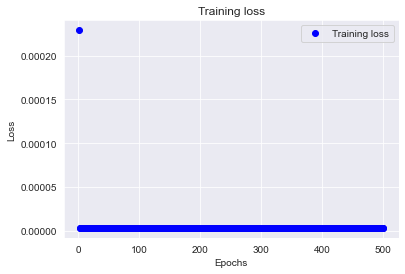

In [21]:
import matplotlib.pyplot as plt

lstm_loss = lstm_history.history['loss']

lstm_epochs = range(1, len(lstm_loss) + 1)

# "bo" is for "blue dot"
plt.plot(lstm_epochs, lstm_loss, 'bo', label='Training loss')

plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [22]:
from tensorflow.keras.models import load_model
try:
    os.mkdir('models')
except:
    print('directory already exists')
    
lstm_model.save('models/lstm.h5')
#lstm_model = load_model('models/lstm.h5')
lstm_history_dict = lstm_history.history
lstm_history_dict.keys()

dict_keys(['loss'])